<a href="https://colab.research.google.com/github/neto-riga/metodos_numericos_2/blob/main/6_interpolaci%C3%B3n_diferencias_divididas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)

#Interpolación por diferencias divididas.
---

La siguiente tabla presenta decesos por COVID del 25 de enero al 3 de febrero de 2022. 
Como se puede observar, los números reportados para los días 6 y 7 parecen atípicos, por lo que se elliminarán y estimarán por interpolación empleando el método de diferencias divididas. 

|Fecha|Día|Decs|
|---|---------|-----|
|25/01/2022|1|475|
|26/01/2022|2|532|
|27/01/2022|3|495|
|28/01/2022|4|437|
|29/01/2022|5|522|
|30/01/2022|6|131|
|31/01/2022|7|198|
|01/02/2022|8|829|
|02/02/2022|9|573|
|03/02/2022|10|648|

1. Construir un polinomio para interpolar del 25 al 29 de enero. 
2. Graficar el polinomio.
3. Elegir puntos y grado del polinomio para estimar valores para los días 6 y 7. 
4. Graficar el polinomio que hayas elegido.
5. Elaborar conclusiones.

In [ ]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()

Aplicamos el método para obtener los coeficientes de los polinomios.

In [ ]:
def diferencias_divididas(x, y, lugar, n, soluciones):
  if lugar == (n+1):
    return 
  
  soluciones_lugar = []
  for i in range(n-(lugar)):
    soluciones_lugar.append((y[i+1] - y[i])/(x[i+lugar]-x[i]))
  
  for _ in range(lugar-1):
    soluciones_lugar.append(0)

  soluciones.append(soluciones_lugar)
  diferencias_divididas(x, soluciones_lugar, lugar+1, n, soluciones)
  return soluciones

Interpolamos del día uno al cinco, que corresponden del 25 de enero al 29, obteniendo los siguientes coeficientes:

In [ ]:
X = [1, 2, 3, 4, 5]
fx = [475, 532, 495, 437, 522]
sol = []
sol = diferencias_divididas(X, fx, 1, 5, sol)
sol = np.array(sol[:-1])
pd.DataFrame(sol)

,0,1,2,3
0,57.000000,-37.000000,-58.0,85.0
1,-47.000000,-10.500000,71.5,0.0
2,12.166667,27.333333,0.0,0.0
3,3.791667,0.000000,0.0,0.0


Aplicamos el método para obtener los polinomios.

In [ ]:
def poli(arr, X, Y, aprox, pos_y):
  res = 0
  mult = 1
  
  for i, a in enumerate(arr):
    mult *= aprox - X[i+pos_y]
    res += a * mult
    
  res += Y[pos_y]
  return res

Obtenemos el polinomio que interpola del día uno al cinco.

In [ ]:
x = sp.Symbol('x')
F1 = lambda x: poli(sol[:,0], X, fx, x, 0)
sp.simplify(poli(sol[:,0], X, fx, x, 0).evalf(5))

3.7917*x**4 - 25.75*x**3 + 12.708*x**2 + 142.25*x + 342.0

Graficamos

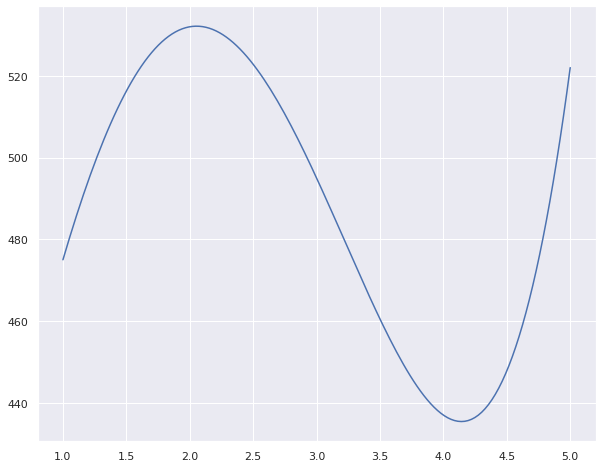

In [ ]:
fig=plt.figure(figsize=(10,8))
X1 = np.linspace(1,5,150)
plt.plot(X1, F1(X1))
plt.show()

## Aproximando los valores para el día 6 y 7

Después de varias configuraciones para la interpolación, encontramos que los días 4, 5, 8 y 9 fueron los mejores para aproximar los decensos por covid.

In [ ]:
X = [4, 5, 8, 9]
fx = [437, 522, 829, 573]
sol = []
sol = diferencias_divididas(X, fx, 1, 4, sol)
sol = np.array(sol[:-1])
pd.DataFrame(sol)

,0,1,2
0,85.000000,102.333333,-256.0
1,4.333333,-89.583333,0.0
2,-18.783333,0.000000,0.0


In [ ]:
print(f"Para el día 6 aproximamos a : {round(poli(sol[:,0], X, fx, 6, 0), 0)} decensos")
print(f"Para el día 7 obtuvimos: {round(poli(sol[:,0], X, fx, 7, 0),0)} decensos")

Para el día 6 aproximamos a : 691.0 decensos
Para el día 7 obtuvimos: 831.0 decensos


Con este polinomio de interpolación

In [ ]:
x = sp.Symbol('x')
F2 = lambda x: poli(sol[:,0], X, fx, x, 0)
sp.simplify(poli(sol[:,0], X, fx, x, 0).evalf(5))

-18.783*x**3 + 323.65*x**2 - 1682.1*x + 3189.0

Graficamos:

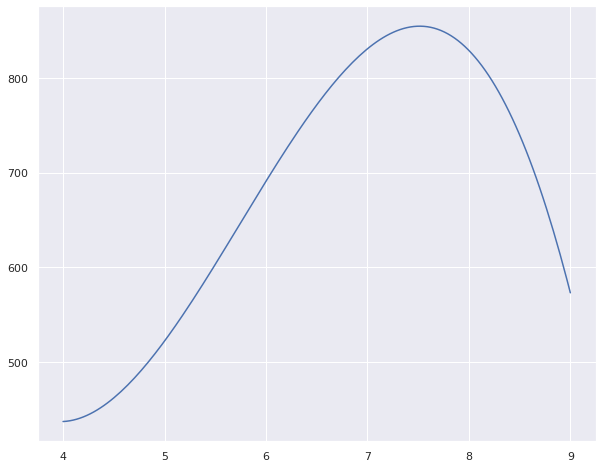

In [ ]:
fig=plt.figure(figsize=(10,8))
X2 = np.linspace(4,9,150)
plt.plot(X2, F2(X2))
plt.show()

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)